 Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products (2).csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Inspect the datasets
print("Customers Dataset:")
print(customers.head(), "\n")
print(customers.info(), "\n")

print("Products Dataset:")
print(products.head(), "\n")
print(products.info(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")
print(transactions.info(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLivi

Check for Missing Values


In [4]:
print("Missing values in Customers dataset:")
print(customers.isnull().sum(), "\n")

print("Missing values in Products dataset:")
print(products.isnull().sum(), "\n")

print("Missing values in Transactions dataset:")
print(transactions.isnull().sum(), "\n")

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [5]:
# Check for duplicates
print("Duplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())

Duplicates in Customers dataset: 0
Duplicates in Products dataset: 0
Duplicates in Transactions dataset: 0


 Perform univariate and bivariate analyses

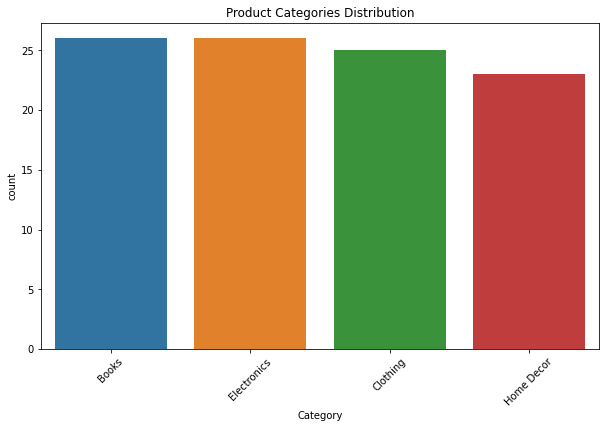

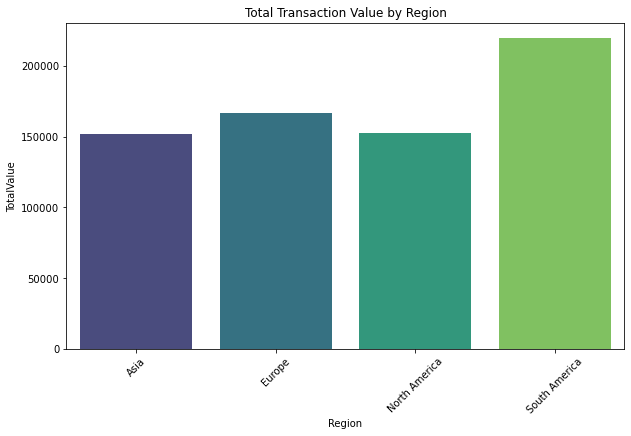

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis - Distribution of product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', order=products['Category'].value_counts().index)
plt.title('Product Categories Distribution')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis - Total transactions by region
merged_data = pd.merge(transactions, customers, on='CustomerID')
region_transactions = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_transactions, x='Region', y='TotalValue', palette='viridis')
plt.title('Total Transaction Value by Region')
plt.xticks(rotation=45)
plt.show()


Merge datasets for deeper analysis

In [9]:
# Merge Customers and Transactions on CustomerID
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Merge with Products on ProductID
final_data = pd.merge(merged_data, products, on='ProductID')

print(final_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

Derive insights

In [10]:
# 1. Most Popular Product Category:

popular_category = final_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Product Categories:\n", popular_category)


Most Popular Product Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [11]:
# 2. Regional Trends:

regional_sales = final_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Sales by Region:\n", regional_sales)


Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [12]:
# 3. Monthly Trends:

final_data['TransactionDate'] = pd.to_datetime(final_data['TransactionDate'])
monthly_sales = final_data.groupby(final_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("Monthly Sales Trends:\n", monthly_sales)


Monthly Sales Trends:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


 Explore Individual Datasets

a. Customers Dataset
1. Count the number of customers in each region.
2. Analyze signup trends over time.

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


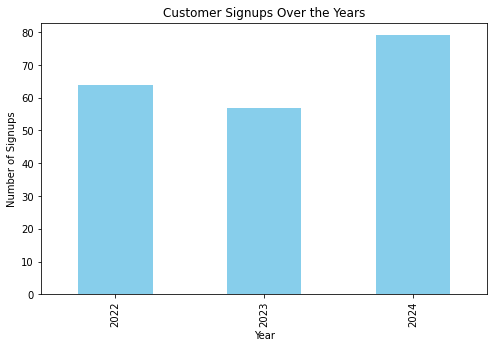

In [14]:
# Count customers by region
print(customers['Region'].value_counts())

# Analyze signup trends
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()

# Plot signup trends
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Customer Signups Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


b. Products Dataset
1. Identify the top categories based on product count or average price.

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


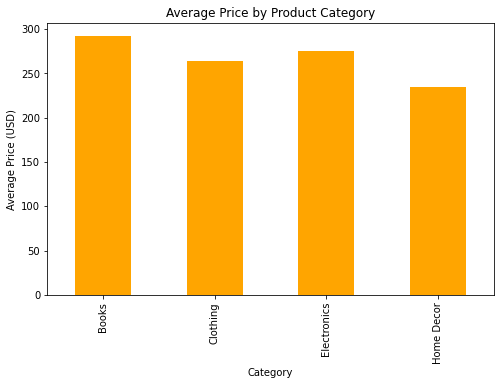

In [15]:
# Count of products per category
print(products['Category'].value_counts())

# Average price per category
average_price = products.groupby('Category')['Price'].mean()
print(average_price)

# Plot average price per category
average_price.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Price by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()


c. Transactions Dataset
1. Analyze transaction trends (e.g., monthly transactions, top products by sales).
2. Total revenue generated.

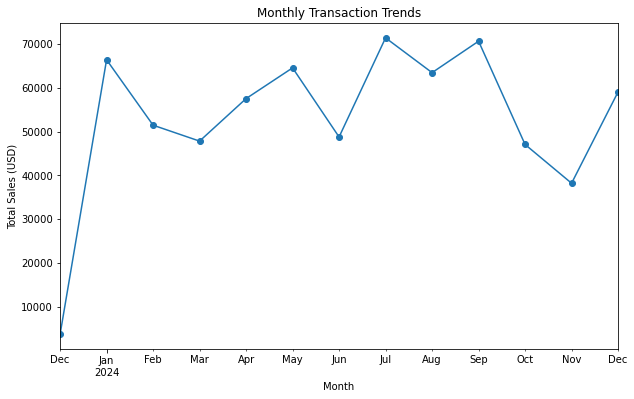

Top 10 Selling Products by Revenue:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


In [16]:
# Monthly transaction trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot transaction trends
monthly_sales.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.show()

# Top-selling products
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(10)
print("Top 10 Selling Products by Revenue:")
print(top_products)


Merge Datasets
Combine the datasets for deeper analysis.

In [17]:
# Merge transactions with products
transactions_products = pd.merge(transactions, products, on='ProductID', how='left')

# Merge with customers
full_data = pd.merge(transactions_products, customers, on='CustomerID', how='left')

# Preview the merged data
print(full_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x    Month                      ProductName     Category  \
0      300.68   300.68  2024-08  ComfortLiving Bluetooth Speaker  Electronics   
1      300.68   300.68  2024-05  ComfortLiving Bluetooth Speaker  Electronics   
2      300.68   300.68  2024-04  ComfortLiving Bluetooth Speaker  Electronics   
3      601.36   300.68  2024-03  ComfortLiving Bluetooth Speaker  Electronics   
4      902.04   300.68  2024-03  ComfortLiving Bluetooth Speaker  Electronics   

   Price_y     CustomerName         Region SignupDate  SignupYear  
0   300.68   Andrea Jenk

Revenue by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


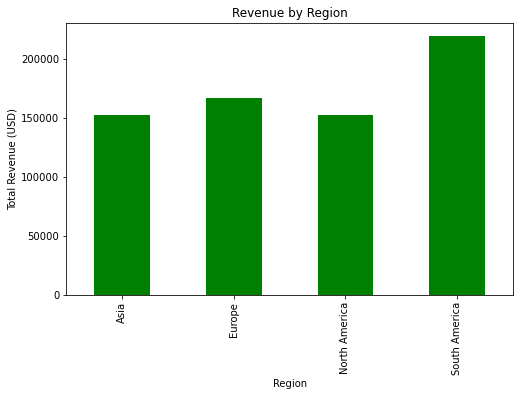

In [18]:
# Revenue by region
revenue_by_region = full_data.groupby('Region')['TotalValue'].sum()
print("Revenue by Region:")
print(revenue_by_region)

# Plot revenue by region
revenue_by_region.plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()
